# Máquina de Atwood | Ligaduras

[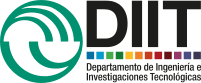](https://ingenieria.unlam.edu.ar/)  
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Enunciado
Obtenga con la ecuación de Euler-Lagrange la aceleración que presentan las pesas que cuelgan de una cuerda de longitud $\ell$ que pasa por sobre una polea de radio $R$ y masa $M$.
1. Resuelva para el caso en que se considera $M$ irrelevante.
1. Resuelva ahora considerando $M$, y que la polea presenta una sección cilíndrica.
El momento de inercia de un cilindro ante rotaciones en torno a su eje de simetría longitudinal es $(M/2) R^2$.

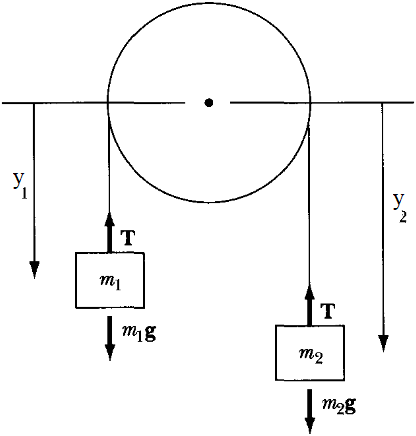

## El modelo físico

In [1]:
import sympy as sym # módulo de cálculo simbólico
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# Sistema de coordenadas
e = mech.ReferenceFrame('e') # sistema de coordenadas
t = sym.symbols('t') # tiempo

# Parámetros físicos del sistema
M, R, m1, m2, g, l = sym.symbols('M, R, m_1, m_2, g, \ell', positive=True)

### Ligaduras
Cada vez que el modelo físico asume una relación entre coordenadas o velocidades generalizades se establere una **ligadura** entre estas.

#### Longitud de la cuerda
De considerar inextensible a la cuerda, es decir que mantiene su longitud $\ell$ como constante se establece una ligadura entre las coordenadas de ambas pesas que cuelgan desde la polea.

Puesto que de la circunferencia de la polea de radio $R$ la cuerda cubre un arco de la mitad de la misma $\pi R$, su longitud total $\ell$ corresponde a la suma de este con la distancia vertical que separa su centro de masa con el de las pesas que cuelgan según
$$
y_1+ y_2 + \pi R = \ell
$$
Tal relación es mejor escribirle como una función homogénea (igualada al valor nulo $0$)
$$
f_1(y_1, y_2) = y_1+ y_2 + \pi R - \ell = 0
$$ 

In [ ]:
y1, y2 = mech.dynamicsymbols('y_1, y_2')
f1 = sym.Eq(y1+ y2 + sym.pi* R - l, 0 ) # ligadura l como función homogénea
f1

#### La cuerda no desliza sobre la polea
Usualmente se establece otra ligadura que involucra a la cuerda.
Si al moverse no desliza en torno a la polea cambia su inclinación.
Esta última podemos describirle con un ángulo, $\theta$.

Un cambio infinitesimal del arco de cuerda sobre la polea causada por un desplazamiento de una de las pesas, e.g. $d y_1$, implica una cambio infinitesimal de $d \theta$ que responde a 
$$
\frac{d y_1}{R} = \frac{d \theta}{\pi}.
$$
Esto resultaría en una media vuelta si $\Delta x_1 = R$ siendo la circunferencia de un círculo $2 \pi R$.

respetando como positivo el sentido en contra de las agujas del reloj.
Tales diferenciales se desarrollan en un infinitesimal de tiempo $d t$ lo que permite relacionar las respectivas velocidades generalizadas.

In [4]:
theta = mech.dynamicsymbols(r'\theta')
f2 = sym.Eq(y1.diff(t)/R - theta.diff(t)/ sym.pi, 0)
f2

## Resolución sin contemplar la polea

### Energía cinética de traslación

Solo los centros de masa de la pesas que cuelgan de la polea se desplazan.
Y el vector posición de ambas puede expresarse usando una única coordenada generalizada explotando la primera de las funciones de ligadura.

Usualmente al conocer la función de ligadura se la aprovecha para despejaría una de las coordenadas o velocidades generalizadas en función de las otras y así reducir el número de grados de libertad requeridos para describir el sistema.

In [5]:
y2_f1 = sym.Eq(y2,
               sym.solveset(f1.lhs, y2).args[0]
              )
y2_f1

Si imaginamos un versor $\hat{e}_y$ que apunte hacia arriba y uno $\hat{e}_x$ que lo haga hacia la derecha de la figura anterior tendremos estas posiciones para ambas particulas que cuelgan en los extremos de la cuerda de la polea.

In [6]:
m1_r = -R * e.x + y1* (-e.y)
m2_r = R * e.x + y2_f1.rhs* (-e.y) # resto longitud hilo y1 y media vuelta polea
m1_r, m2_r

Para lo atañe a lo pedido en este enunciado la posición en $\mathbf{\hat{e}_x}$ es irrelevante, pero es bueno dejarle expresada por si en el futuro se utiliza tal información.

In [7]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [8]:
# Energía cinética del sistema
m1_T = energíaCinéticaPartícula(m1, m1_r, e)
m2_T = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), m1_T + m2_T ).simplify() # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial gravitatoria

Es tentador crear una función que calcule la energía potencial gravitatoria de cada partícula del sistema a partir de
$$
V_\mathrm{gravitatoria} = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

In [12]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Energía potencial gravitatoria: (sympy.core.mul.Mul)
        - (m \vec{g}) \cdot{r}
    """
    return - (masa* aceleracionGravitatoria).dot(posición)

In [10]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
m1_V = energíaPotencialGravitatoria(m1, m1_r, g_vector)
m2_V = energíaPotencialGravitatoria(m2, m2_r, g_vector)
V = sym.Eq(sym.Symbol('V'), m1_V+ m2_V ).simplify()
V

### Lagrangiano del sistema
Recordemos que hay un único Lagrangiano por sistema calculado con sus energías cinética y potencial que en el caso más general puede depender de las coordenadas y velocidades generalizadas, así como explícitamente con el tiempo
$$
\mathcal{L}(q_i, \dot{q}_i, t) = T(q_i, \dot{q}_i, t)- V(q_i, \dot{q}_i, t).
$$

Se obvió cualquier consideración sobre la polea.
Tanto la coordenada generalizada que describe su orientación $\theta$, como la correspondiente velocidad generalizada $\dot{\theta}$ está ausente del Lagrangiano que resulta una función de la coordenada generalizada $x_1$ y la velocidad generalizada $\dot{x}_1$
$$
\mathcal{L}(x_1, \dot{x}_1) = T(\dot{x}_1)- V(x_1).
$$

In [11]:
sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify() )

### Un único grado de libertad, una única ecuación de Euler-Lagrange

Aunque en este caso se requiere calcular una única ecuación de Euler-Lagrange, en general se requieren tantas como como coordenadas $q$ hay en el sistema. 

Nuevamente es tentador armar una función que haga el trabajo de calcular
$$
\frac{\partial}{\partial q} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}} \mathcal{L} = 0
$$

In [12]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sym.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sym.Eq(
        lagrangiano.diff(coordenadaGeneralizada) 
        - lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        , 0
    ).simplify()

In [13]:
x1_EL = eulerLagrange(T, V, y1)
x1_EL

### Despejando la aceleración
Podemos despejar $\ddot{x}$ y asignar este resultado a una variable para uso posterior

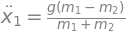

In [14]:
m1_a = sym.Eq(y1.diff(t,2), sym.solve(y1_EL, y1.diff(t,2))[0]  )# [0] toma el único elemento de la lista
m1_a

Más adelante en el curso ejercitaremos el dar valores a los parámetros y condiciones iniciales del sistema para poder calcular numéricamente $x(t)$.

## Resolución contemplando la polea

### Energía cinética de rotación

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular \\(\vec{\omega}\\).

Veremos más adelante en el curso, cuando introduzcamos el **tensor de inercia** $\overline{\overline{I}}$ de un cuerpo extenso, que la energía cinética de rotación se calcula como
$$
T_\mathrm{rotación} = \frac{1}{2} \overline{\overline{I}} \vec{\omega} \vec{\omega},
$$
y que esta se reduce a
$$
T_\mathrm{rotación} = \frac{1}{2} I \vec{\omega}^2 ,
$$
cuando $\vec{\omega}$ está alineado con uno de los ejes de simetría del cuerpo y nos basta con conocer solo uno de los elementos del tensor, el **momento de inercia** $I$ que correspondiente a esta dirección de $\vec{\omega}$.

In [15]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.
    
    Parámetros
    ----------
    momentoDeInercia : Igualdad Sympy (sympy.Equality)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Igualdad Sympy (sympy.Equality)
        Velocidad de rotación en torno a un eje.
        
    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* momentoDeInercia* velocidadAngular**2

El momento de inercia para un cilindro de masa $m$ y radio $R$ girando en torno a su eje longitudinal de simetría
$$
I_\mathrm{cilindro} = \frac{1}{2} m R^2.
$$

In [16]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
I_cilindro = sym.Eq(
    sym.Symbol('I'),
    unMedio* M* R**2
) # momento de inercia de rotación en torno a su eje de simetría longitudinal
velocidadAngular_cilindro = theta.diff(t)

T_rotaciónPolea = sym.Eq(
    sym.Symbol('T_\mathrm{rotación}'),
    energíaCinéticaRotación(I_cilindro.rhs, velocidadAngular_cilindro ) 
)
T_rotaciónPolea

Recordemos que tenemos una ligadura que nos permite obviar $\dot{\theta}$ como variable.

In [17]:
thetaPunto_f2 = sym.Eq(
    velocidadAngular_cilindro,
    sym.solveset(f2.lhs, velocidadAngular_cilindro ).args[0] 
)
thetaPunto_f2

In [18]:
T_rotaciónPolea_x1 = T_rotaciónPolea.subs(velocidadAngular_cilindro, thetaPunto_f2.rhs)
T_rotaciónPolea_x1

Contemplando esta nueva contribución a la energía cinética del sistema esta es ahora

In [19]:
T_conPolea = sym.Eq(
    sym.Symbol('T_\mathrm{c/polea}'),
    T.rhs + T_rotaciónPolea_x1.rhs
)
T_conPolea

Y la ecuación de Euler-Lagrange es ahora

In [20]:
x1_EL_conPolea = eulerLagrange(T_conPolea, V, x1)
x1_EL_conPolea

Y evidéntemente menor será aceleración

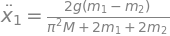

In [21]:
m1_a_conPolea = sym.Eq(y1.diff(t,2), sym.solve(y1_EL_conPolea, y1.diff(t,2) )[0]  )# [0] toma el único elemento de la lista
m1_a_conPolea